# 01 - Exploratory Data Analysis
This notebook performs exploratory data analysis on the classification dataset.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

## Load Data

In [3]:
# Load training data
train_df = pd.read_csv('../data/train.csv')
# Load test data
test_df = pd.read_csv('../data/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"\nTrain columns: {train_df.columns.tolist()}")
print(f"Test columns: {test_df.columns.tolist()}")

Train shape: (57477, 9)
Test shape: (3, 4)

Train columns: ['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b', 'winner_model_a', 'winner_model_b', 'winner_tie']
Test columns: ['id', 'prompt', 'response_a', 'response_b']


## Data Overview

In [4]:
# Display first few rows
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
# Data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


In [6]:
# Check for missing values
print("Missing values:")
print(train_df.isnull().sum())

Missing values:
id                0
model_a           0
model_b           0
prompt            0
response_a        0
response_b        0
winner_model_a    0
winner_model_b    0
winner_tie        0
dtype: int64


## Label Distribution

In [ ]:
# Winner distribution analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if 'train_df' not in locals():
    train_df = pd.read_csv('../data/train.csv')

# Check winner columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

if 'winner_model_a' in train_df.columns:
    winner_a = train_df['winner_model_a'].value_counts()
    axes[0].bar(winner_a.index, winner_a.values)
    axes[0].set_title('Model A Wins Distribution')
    axes[0].set_ylabel('Count')

if 'winner_model_b' in train_df.columns:
    winner_b = train_df['winner_model_b'].value_counts()
    axes[1].bar(winner_b.index, winner_b.values)
    axes[1].set_title('Model B Wins Distribution')
    axes[1].set_ylabel('Count')

if 'winner_tie' in train_df.columns:
    winner_tie = train_df['winner_tie'].value_counts()
    axes[2].bar(winner_tie.index, winner_tie.values)
    axes[2].set_title('Tie Distribution')
    axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Text Statistics

In [4]:
# Text statistics for prompt and responses
import pandas as pd
import numpy as np

if 'train_df' not in locals():
    train_df = pd.read_csv('../data/train.csv')

# Analyze text columns: prompt, response_a, response_b
text_columns = ['prompt', 'response_a', 'response_b']
available_cols = [col for col in text_columns if col in train_df.columns]

print("Text Statistics:\n")
for col in available_cols:
    train_df[f'{col}_length'] = train_df[col].astype(str).str.len()
    train_df[f'{col}_words'] = train_df[col].astype(str).str.split().str.len()
    
    print(f"\n{col.upper()}:")
    print(f"  Length (characters) - Mean: {train_df[f'{col}_length'].mean():.1f}, Median: {train_df[f'{col}_length'].median():.1f}")
    print(f"  Word count - Mean: {train_df[f'{col}_words'].mean():.1f}, Median: {train_df[f'{col}_words'].median():.1f}")

# Display summary statistics
print("\n\nDetailed Statistics:")
for col in available_cols:
    print(f"\n{col}:")
    print(train_df[f'{col}_length'].describe())

Text Statistics:


PROMPT:
  Length (characters) - Mean: 369.2, Median: 96.0
  Word count - Mean: 54.0, Median: 16.0

RESPONSE_A:
  Length (characters) - Mean: 1377.8, Median: 1076.0
  Word count - Mean: 204.4, Median: 162.0

RESPONSE_B:
  Length (characters) - Mean: 1386.2, Median: 1086.0
  Word count - Mean: 205.2, Median: 163.0


Detailed Statistics:

prompt:
count    57477.000000
mean       369.198584
std       1073.341472
min          7.000000
25%         52.000000
50%         96.000000
75%        243.000000
max      33056.000000
Name: prompt_length, dtype: float64

response_a:
count    57477.000000
mean      1377.818919
std       1513.932333
min          4.000000
25%        408.000000
50%       1076.000000
75%       1862.000000
max      54058.000000
Name: response_a_length, dtype: float64

response_b:
count    57477.000000
mean      1386.162169
std       1537.800488
min          4.000000
25%        413.000000
50%       1086.000000
75%       1873.000000
max      53830.000000
Name:

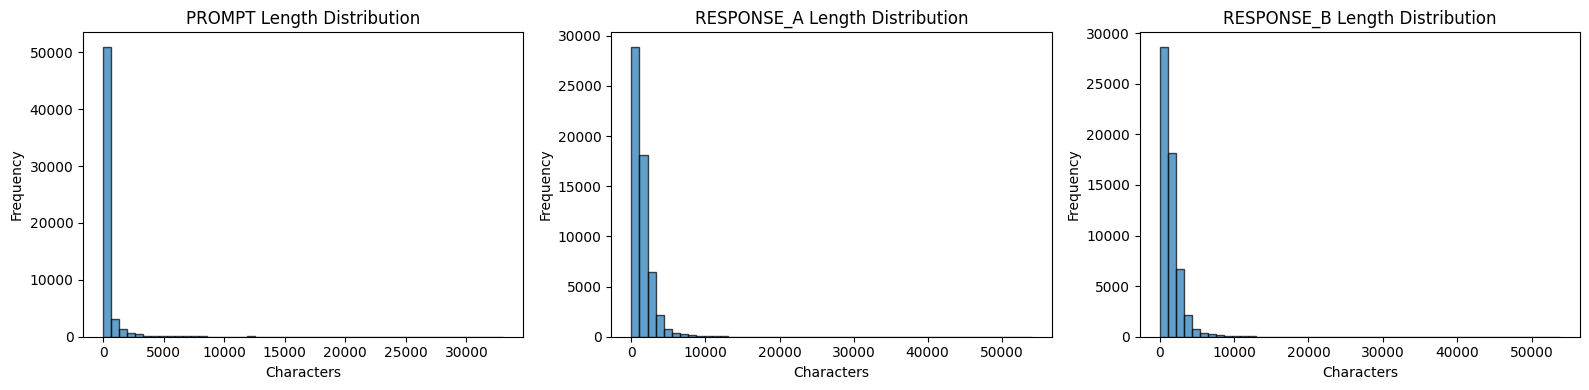

In [5]:
# Visualize text length distributions
import pandas as pd
import matplotlib.pyplot as plt

if 'train_df' not in locals():
    train_df = pd.read_csv('../data/train.csv')

# Create length columns if they don't exist
text_columns = ['prompt', 'response_a', 'response_b']
for col in text_columns:
    if col in train_df.columns:
        if f'{col}_length' not in train_df.columns:
            train_df[f'{col}_length'] = train_df[col].astype(str).str.len()

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, col in enumerate(text_columns):
    if col in train_df.columns:
        axes[idx].hist(train_df[f'{col}_length'], bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col.upper()} Length Distribution')
        axes[idx].set_xlabel('Characters')
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()